In [64]:
!pip install cytoolz

In [156]:
!pip install --ignore-installed six


tensorflow 1.6.0 has requirement tensorboard<1.7.0,>=1.6.0, but you'll have tensorboard 1.8.0 which is incompatible.


In [237]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split





#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [271]:
train = pd.read_csv("/Users/DaKanWei/Desktop/Jigsaw/gifts/train.csv")
test = pd.read_csv("/Users/DaKanWei/Desktop/Jigsaw/gifts/test.csv")

In [239]:
train.shape

(95851, 8)

In [240]:
test.shape

(226998, 2)

In [273]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [274]:
test.head()

,id,comment_text
0,6044863,==Orphaned non-free media (Image:41cD1jboEvL. ...
1,6102620,::Kentuckiana is colloquial. Even though the ...
2,14563293,"Hello fellow Wikipedians,\nI have just modifie..."
3,21086297,"AKC Suspensions \nThe Morning Call - Feb 24, 2..."
4,22982444,== [WIKI_LINK: Talk:Celts] ==


In [31]:
test.tail()

,id,comment_text
226993,999966872214,*{Persondata
226994,999968525410,'' — is wishing you a [WIKI_LINK: Mary Poppin...
226995,999980053494,==Fair use rationale for [WIKI_LINK: Image:D.R...
226996,999980680364,== Employment Practices at Majestic ==
226997,999997819802,Welcome to Wikipedia. Although everyone is wel...


In [32]:
df = pd.concat([train['comment_text'], test['comment_text']], axis=0)

## Logistic

In [140]:
df = df.fillna("unknown")

In [141]:
nrow_train = train.shape[0]

In [142]:
nrow_train

95851

In [143]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)

In [144]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [145]:
X = vectorizer.fit_transform(df)

In [288]:
print(X)

  (0, 30948)	0.30396928727113465
  (0, 25184)	0.4393103278542969
  (0, 19033)	0.47237143020057115
  (0, 38801)	0.2323634223296605
  (0, 45516)	0.25617821992428425
  (0, 26627)	0.22631644091660186
  (0, 2149)	0.25077522536720553
  (0, 44150)	0.5076878516167566
  (1, 46862)	0.4685673662499069
  (1, 32514)	0.3563500911784594
  (1, 13443)	0.3300732056881298
  (1, 15110)	0.29341768282781794
  (1, 10939)	0.4253375389194578
  (1, 6677)	0.39810795963121526
  (1, 15119)	0.34498551934487665
  (2, 34267)	0.3579615623273939
  (2, 37287)	0.12862778549807305
  (2, 39551)	0.1279699490002058
  (2, 2353)	0.12235737788669296
  (2, 25134)	0.16668738739771755
  (2, 41511)	0.3154806523123656
  (2, 25280)	0.11039355213392311
  (2, 35120)	0.15029550542542383
  (2, 13450)	0.14196846937196633
  (2, 28210)	0.15059288687462244
  :	:
  (322848, 48108)	0.27393400144686725
  (322848, 25941)	0.10677708213946618
  (322848, 10992)	0.1067512278992404
  (322848, 1393)	0.16794530932789048
  (322848, 27407)	0.241578176494

In [147]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [148]:
preds = np.zeros((test.shape[0], len(col)))

In [149]:
preds

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [150]:
loss = []

In [295]:
for i, j in enumerate(col):
    print('===Fit '+j+'===')
    model = LogisticRegression()
    model.fit(X[:nrow_train], train[j])
    preds[:,i] = model.predict_proba(X[nrow_train:])[:,1]   
    pred_train = model.predict_proba(X[:nrow_train])[:,1]
    print('ROC AUC:', roc_auc_score(train[j], pred_train))
    loss.append(roc_auc_score(train[j], pred_train))

===Fit toxic===
ROC AUC: 0.9848232752849416
===Fit severe_toxic===
ROC AUC: 0.9921745527411732
===Fit obscene===
ROC AUC: 0.9935666730984923
===Fit threat===
ROC AUC: 0.9944880553629133
===Fit insult===
ROC AUC: 0.9879963066164954
===Fit identity_hate===
ROC AUC: 0.9897514246294196


In [152]:
print('mean column-wise ROC AUC:', np.mean(loss))

mean column-wise ROC AUC: 0.9904667146222392


In [153]:
preds

array([[0.03028519, 0.00378417, 0.01951666, 0.0018403 , 0.01662016,
        0.00455423],
       [0.02754215, 0.00319991, 0.00976464, 0.00177092, 0.01340872,
        0.00405078],
       [0.00431211, 0.00166651, 0.00355341, 0.00108098, 0.00397787,
        0.00147819],
       ...,
       [0.01146587, 0.00233255, 0.00929808, 0.0014294 , 0.01008123,
        0.00342194],
       [0.05670316, 0.00688726, 0.02775412, 0.00276022, 0.03034998,
        0.00704786],
       [0.00581974, 0.00078326, 0.00206566, 0.00055257, 0.00233884,
        0.00072521]])

## Stat

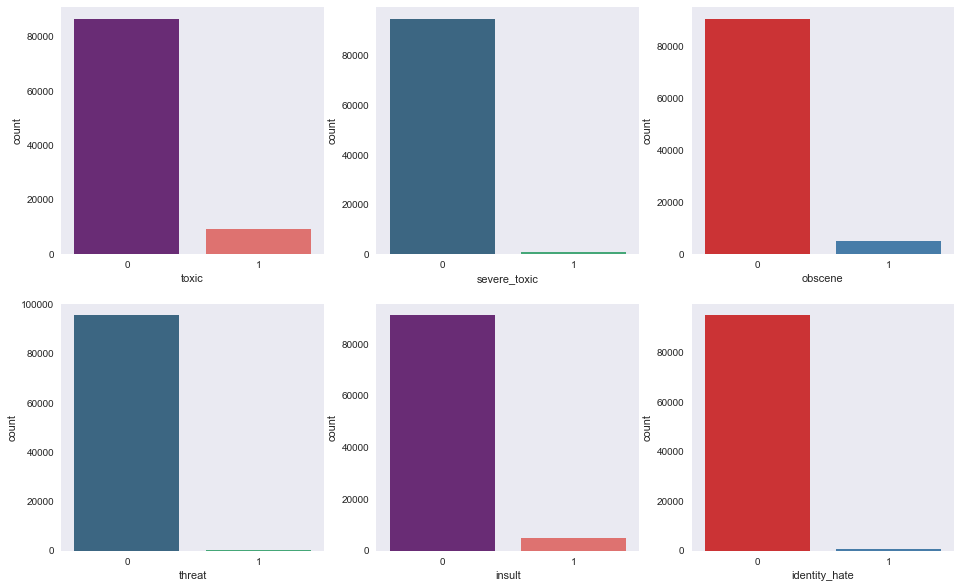

In [261]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'magma',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'Set1', ax = ax6)

In [266]:
#datasize train:test = 7:3
nrow_train=train.shape[0]
nrow_test=test.shape[0]
sum=nrow_train+nrow_test
print("         train : test")
print("rows    :",nrow_train,":",nrow_test)
print("ratio   :",round(nrow_train*100/sum),"   :",round(nrow_test*100/sum))

         train : test
rows    : 95851 : 226998
ratio   : 30    : 70


In [292]:
nrow_train

95851

In [276]:
#class imbalance in training data
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total labels =",x.sum())

Total comments =  95851
Total clean comments =  86061
Total labels = 21195


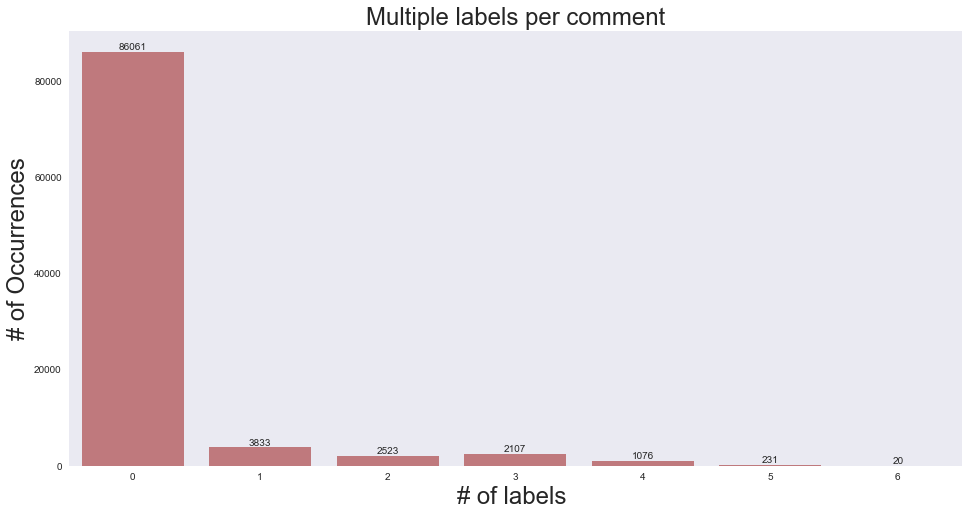

In [281]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple labels per comment", fontsize=24)
plt.ylabel('# of Occurrences', fontsize=24)
plt.xlabel('# of labels ', fontsize=24)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [272]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    1
dtype: int64
filling NA with "unknown"


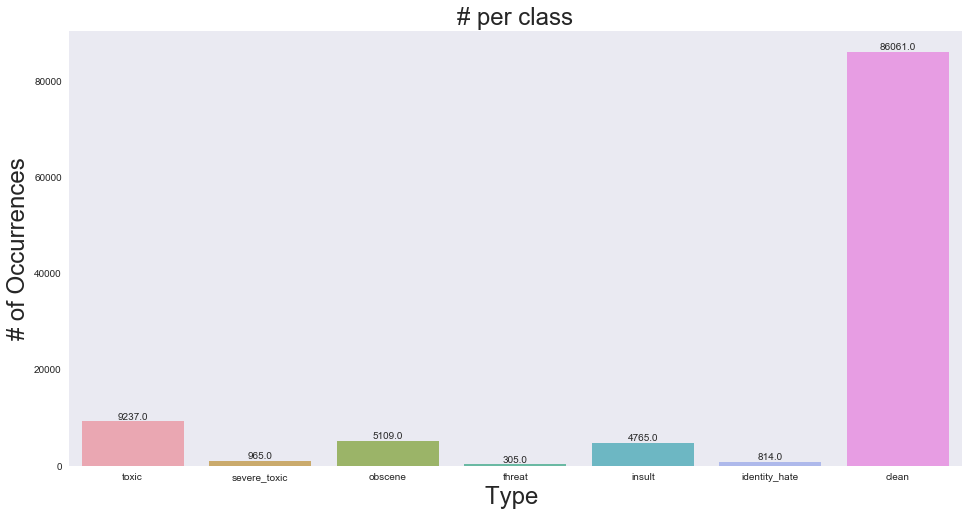

In [284]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(16,8))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class", fontsize = 24)
plt.ylabel('# of Occurrences', fontsize=24)
plt.xlabel('Type ', fontsize=24)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

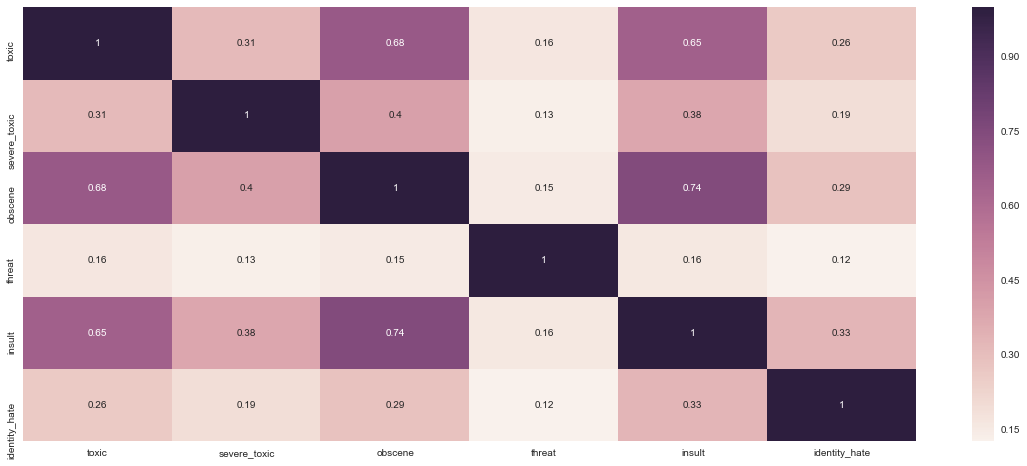

In [260]:
temp_df=train.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [248]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)
out

severe_toxic      obscene       threat      insult        \
severe_toxic            0    1       0     1      0    1      0     1   
toxic                                                                   
0                   86614    0   86302   312  86598   16  86294   320   
1                    8272  965    4440  4797   8948  289   4792  4445   

             identity_hate       
severe_toxic             0    1  
toxic                            
0                    86551   63  
1                     8486  751

In [249]:
#https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix/39266194
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [250]:
#Checking for Toxic and Severe toxic for now
import pandas as pd
col1="toxic"
col2="severe_toxic"
confusion_matrix = pd.crosstab(temp_df[col1], temp_df[col2])
print("Confusion matrix between toxic and severe toxic:")
print(confusion_matrix)
new_corr=cramers_corrected_stat(confusion_matrix)
print("The correlation between Toxic and Severe toxic using Cramer's stat=",new_corr)

Confusion matrix between toxic and severe toxic:
severe_toxic      0    1
toxic                   
0             86614    0
1              8272  965
The correlation between Toxic and Severe toxic using Cramer's stat= 0.30861750191899207


In [252]:
stopword=set(STOPWORDS)

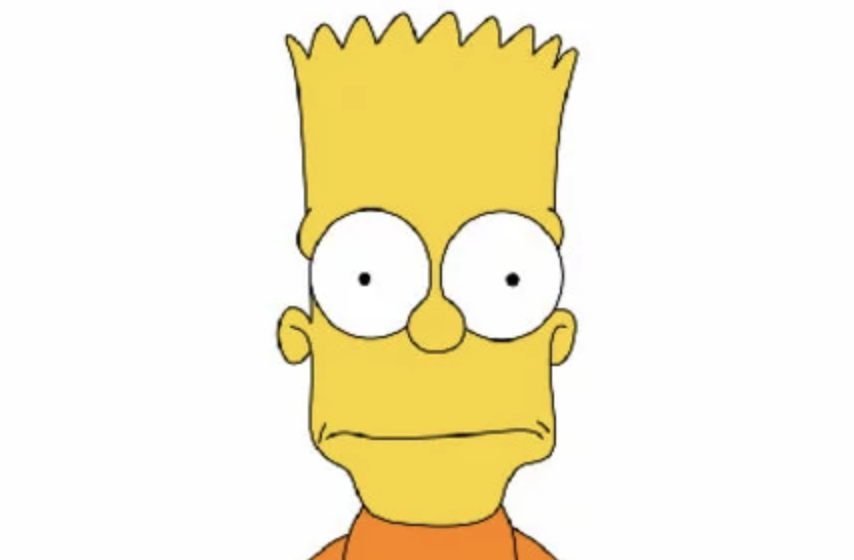

In [183]:
Image.open("/Users/DaKanWei/Desktop/Jigsaw/wordcloudimage/bart_simpson_teaser.png")

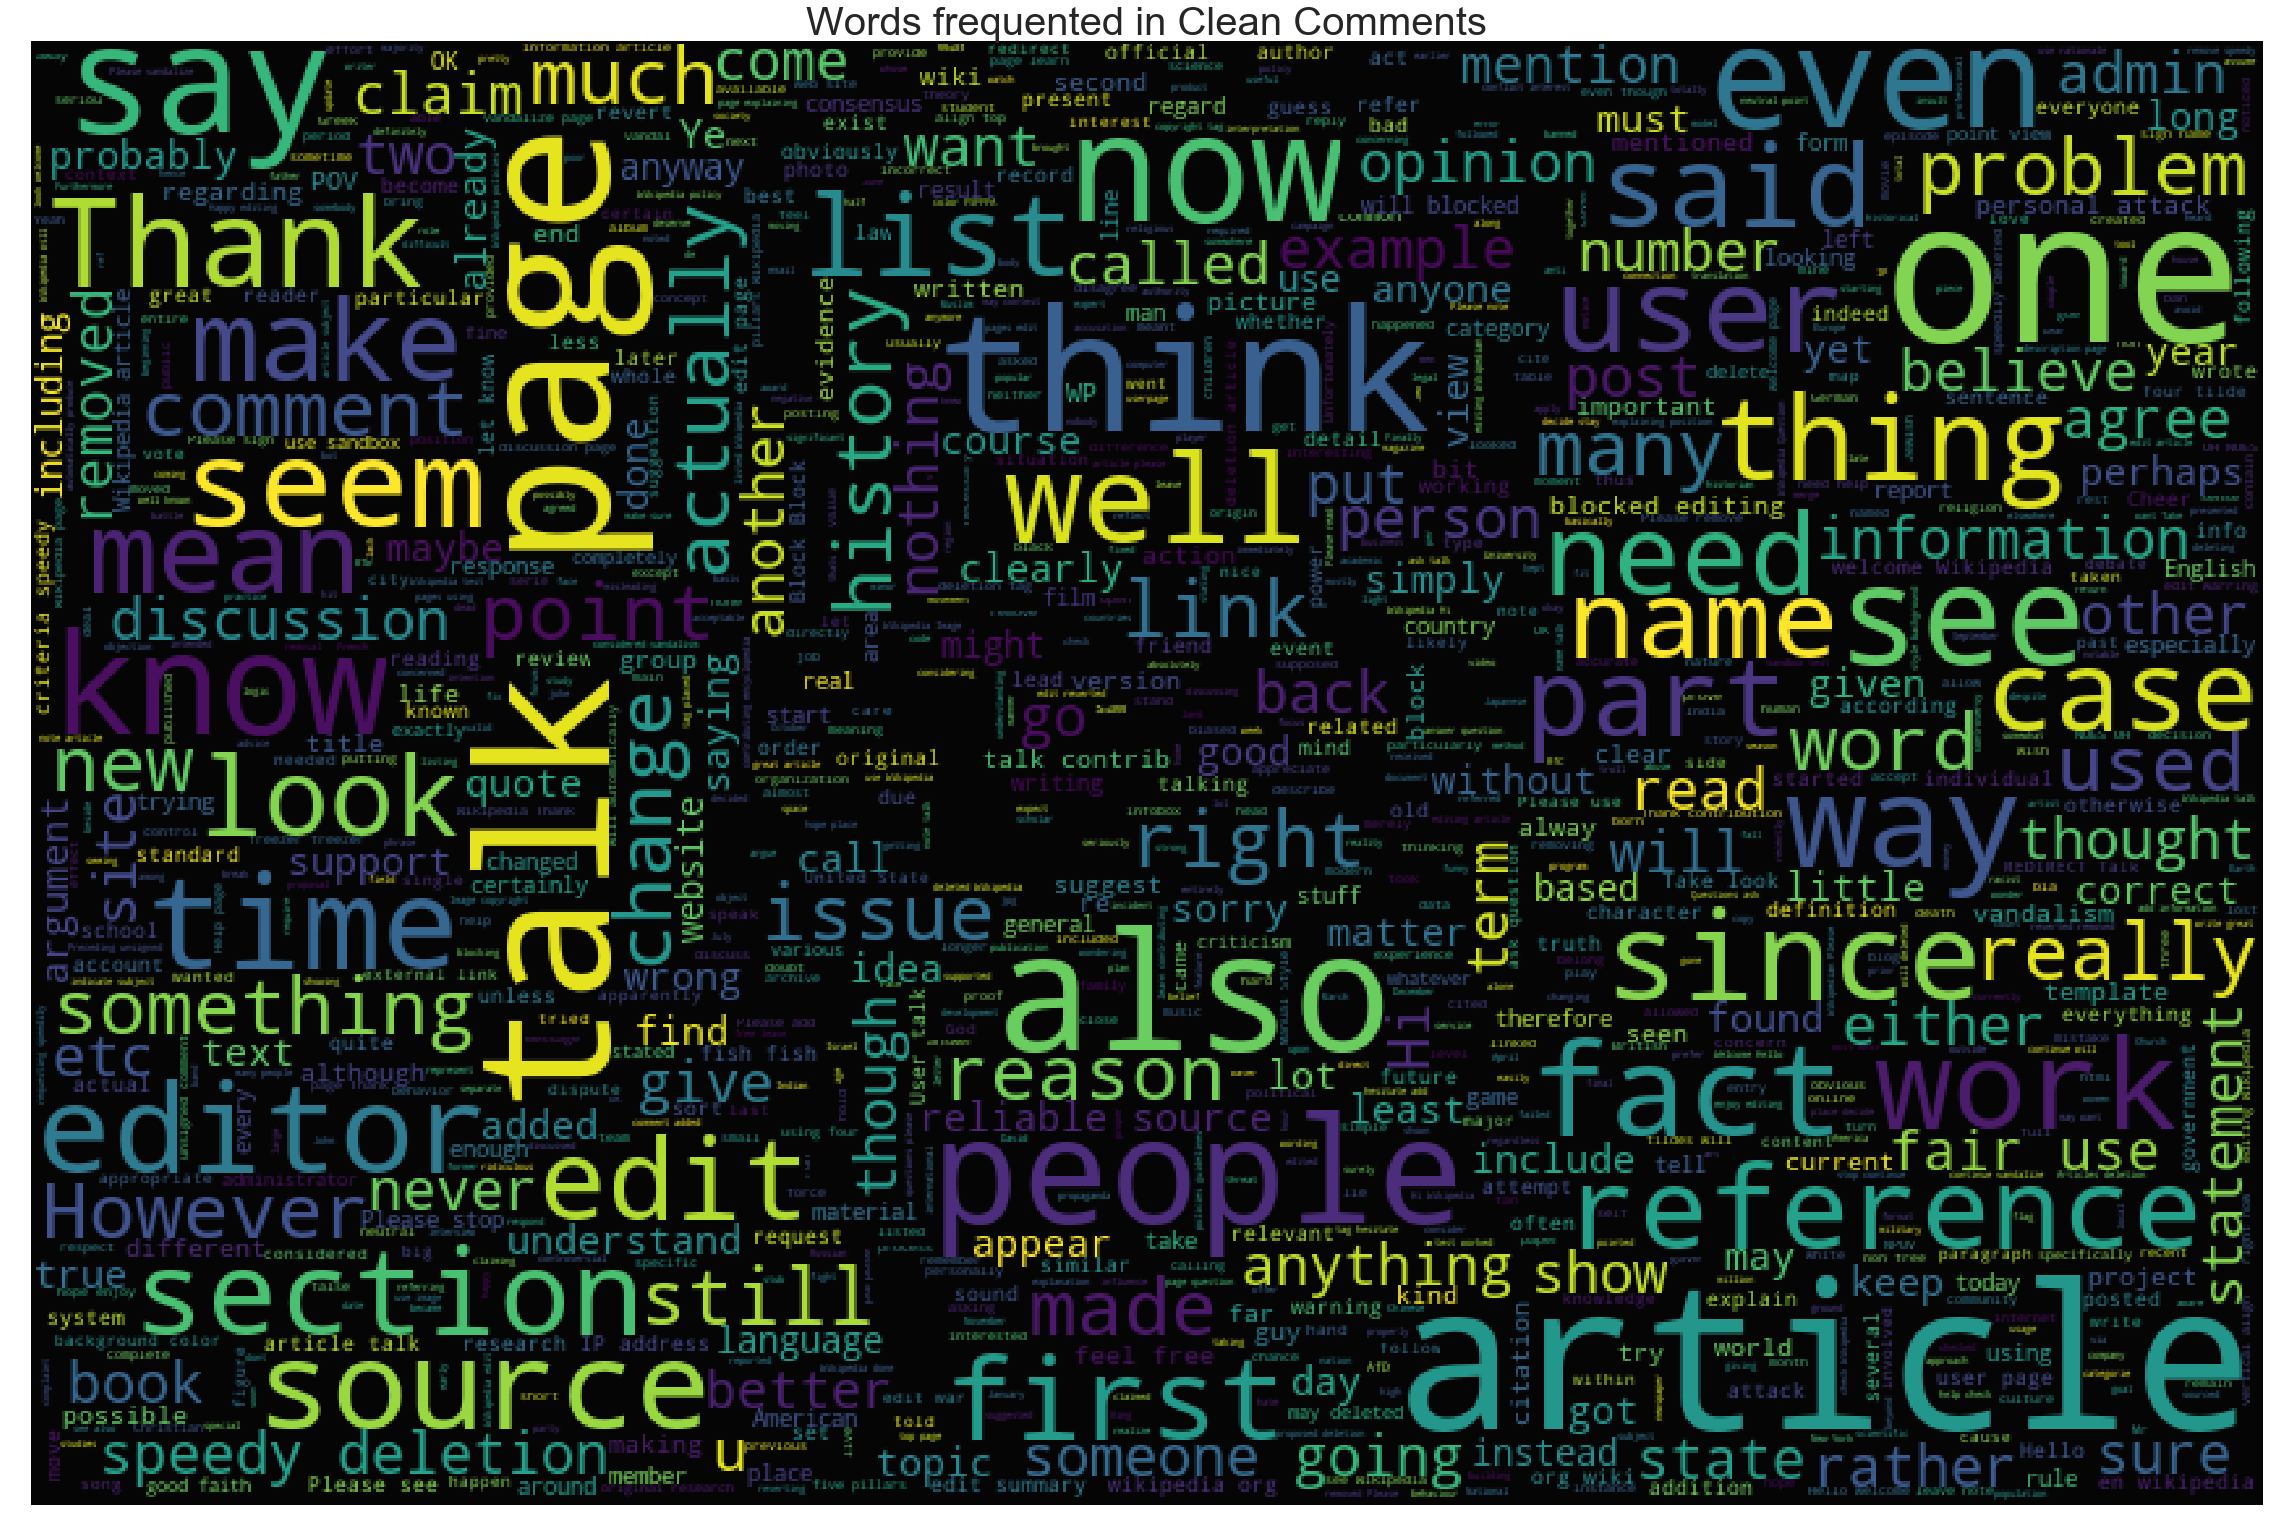

In [287]:
#clean comments
clean_mask=np.array(Image.open("/Users/DaKanWei/Desktop/Jigsaw/wordcloudimage/bart_simpson_teaser.png"))
clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(40,40))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

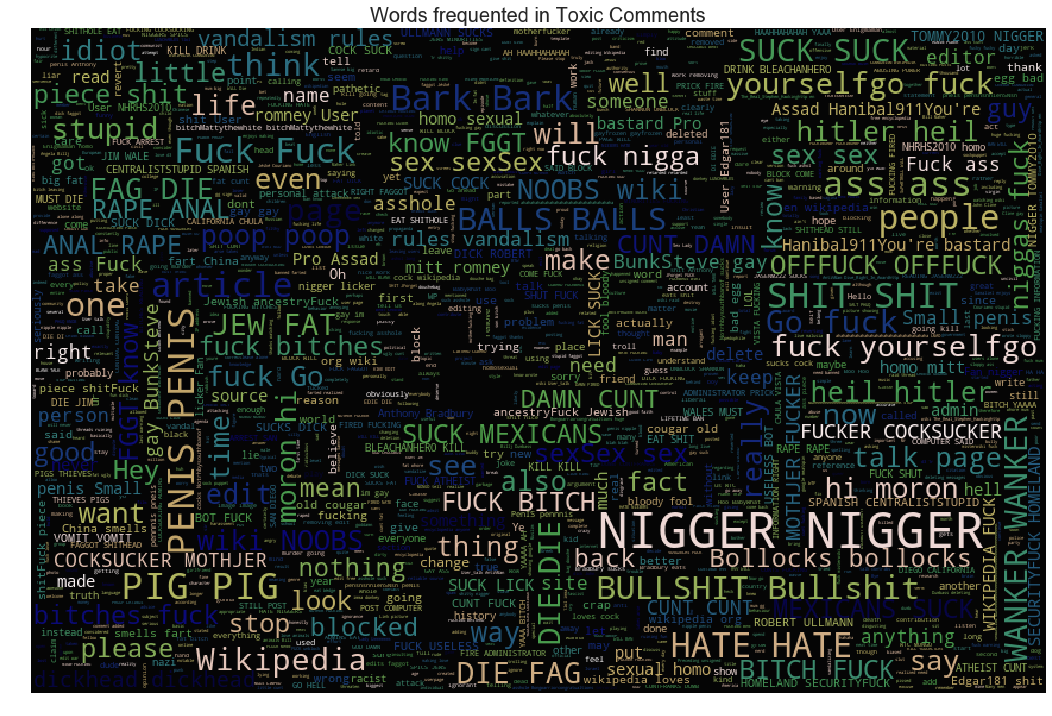

In [189]:
toxic_mask=np.array(Image.open("/Users/DaKanWei/Desktop/Jigsaw/wordcloudimage/bart_simpson_teaser.png"))
toxic_mask=toxic_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(40,40))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)